In [43]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
#import VGG16
from keras.applications.vgg16 import VGG16
#import VGG19
from keras.applications.vgg19 import VGG19
#import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.preprocessing import image 
from sklearn.metrics import classification_report, confusion_matrix

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import numpy as np

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    return img

Image shape: (183, 275, 3)


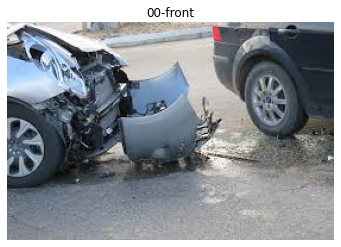

In [9]:
# View a random image 
img = view_random_image(target_dir="data/data2a/training/",
                        target_class="00-front")

In [10]:
train="data/data2a/training/"
test="data/data2a/validation/"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42, shuffle=True )

valid_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42, shuffle=True)

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [11]:
#enter name of the model, used only to use as path name for saving weights
#Resnet , #Vgg19
model_chosen = "Resnet"

#VGG16 - uncomment below code block to use VGG16 model
###
# pre_trained = VGG16(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)  
###

#VGG19 - uncomment below code block to use VGG19 model
###
# pre_trained = VGG19(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)  
###

#Resnet - uncomment below code block to use Resnet50 model
pre_trained = ResNet50(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)  


# this will exclude the initial layers from training phase as there are already been trained.
for layer in pre_trained.layers:
    layer.trainable = False

x = Flatten()(pre_trained.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(3, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = pre_trained.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model 
history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
31/31 [==============================] - 52s 2s/step - loss: 3.2619 - accuracy: 0.3493 - val_loss: 1.1915 - val_accuracy: 0.4269
Epoch 2/10
31/31 [==============================] - 47s 2s/step - loss: 1.0437 - accuracy: 0.4709 - val_loss: 1.0999 - val_accuracy: 0.4678
Epoch 3/10
31/31 [==============================] - 47s 2s/step - loss: 1.0905 - accuracy: 0.3606 - val_loss: 1.1144 - val_accuracy: 0.2924
Epoch 4/10
31/31 [==============================] - 47s 2s/step - loss: 1.0503 - accuracy: 0.4484 - val_loss: 1.1727 - val_accuracy: 0.3216
Epoch 5/10
31/31 [==============================] - 47s 2s/step - loss: 1.0445 - accuracy: 0.4556 - val_loss: 1.0932 - val_accuracy: 0.4211
Epoch 6/10
31/31 [==============================] - 47s 2s/step - loss: 1.0103 - accuracy: 0.4688 - val_loss: 1.1166 - val_accuracy: 0.4035
Epoch 7/10
31/31 [==============================] - 47s 2s/step - loss: 0.9949 - accuracy: 0.4770 - val_loss: 1.1606 - val_accuracy: 0.4035
Epoch 8/10
31/31 [==

In [13]:
save_path = "saved_checkpoints/" + model_chosen + "car_damage_location_model.h5"


model.save(save_path)

In [15]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def pred_and_plot(model, filename):
    
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred=pred.argmax()

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred}")
    plt.axis(False);

In [16]:
target_dir="data/data2a/training/"

target_class="00-front"

target_folder = target_dir+target_class
random_image = random.sample(os.listdir(target_folder), 1)[0]


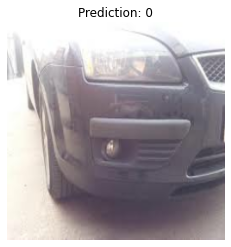

In [17]:
# Test our model 
pred_and_plot(model, target_folder + "/" + random_image)

In [ ]:
test_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

In [18]:
prediction = model.predict(test_data)

In [40]:
y_pred = []
for each in prediction:
    max_value = max(each)

    max_index = list(each).index(max_value)

    y_pred.append(max_index)

In [44]:
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=valid_data.labels)

In [45]:
conf_matrix

array([[58, 12,  3],
       [39,  8,  3],
       [41,  4,  3]], dtype=int64)

[Text(0, 0.5, 'Front'), Text(0, 1.5, 'Rear'), Text(0, 2.5, 'Side')]

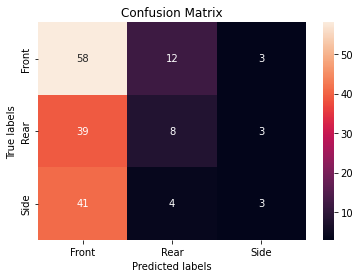

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Front', 'Rear', 'Side']); ax.yaxis.set_ticklabels(['Front', 'Rear', 'Side'])

In [48]:
print(classification_report(y_true=valid_data.labels, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.42      0.79      0.55        73
           1       0.33      0.16      0.22        50
           2       0.33      0.06      0.11        48

    accuracy                           0.40       171
   macro avg       0.36      0.34      0.29       171
weighted avg       0.37      0.40      0.33       171

